---
# 행정동별 대중교통과 따릉이 이용량 비교 (연간 합계 기준)

- 이 노트북에서는 **`bus_hourly_by_admin_dong_2024.csv`**, **`subway_usage_summary.csv`**, **`bike_rental_summary.csv`** 데이터를 사용하여  
  **버스**, **지하철**, **따릉이**의 **행정동별 연간 이용량**을 비교합니다.
- `버스 + 지하철` 이용량을 합산한 **대중교통 총 이용량**과 **따릉이 대여량** 간의 관계를 분석하고,  
  **산점도 및 상관계수 시각화**를 통해 상관성을 확인합니다.
---

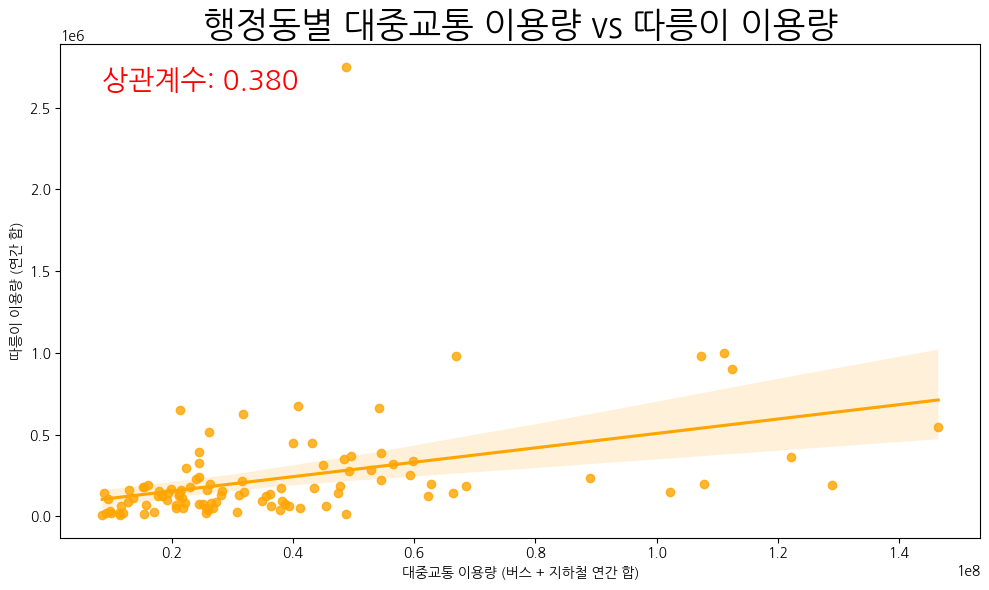

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 파일 불러오기
bus = pd.read_csv("../data/bus_hourly_by_admin_dong_2024.csv")
subway = pd.read_csv("../data/subway_usage_summary.csv")
bike = pd.read_csv("../data/bike_rental_summary.csv")

# 2. 연간 버스 이용량 (행정동별 합)
bus_total = bus.groupby(['행정동', 'gu'], as_index=False)['total_passenger'].sum()

# 3. 지하철 데이터 준비 (컬럼명 통일)
subway = subway.rename(columns={'dong': '행정동'})

# 4. 버스 + 지하철 통합 대중교통 이용량
transit = pd.merge(bus_total, subway, on=['행정동', 'gu'], how='left')
transit['public_total'] = transit['total_passenger'] + transit['subway_count']

# 5. 따릉이 연간 합계 계산
bike_total = bike.groupby(['dong', 'gu'], as_index=False)['bike_count'].sum()
bike_total = bike_total.rename(columns={'dong': '행정동'})

# 6. 최종 통합 (행정동 + 구 기준)
final = pd.merge(transit[['행정동', 'gu', 'public_total']], bike_total, on=['행정동', 'gu'], how='inner')

# 7. 시각화 및 상관계수
plt.figure(figsize=(10, 6))
sns.regplot(data=final, x='public_total', y='bike_count', scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
plt.xlabel("대중교통 이용량 (버스 + 지하철 연간 합)")
plt.ylabel("따릉이 이용량 (연간 합)")
plt.title("행정동별 대중교통 이용량 vs 따릉이 이용량", fontsize=25)

# 상관계수 표시
corr = final['public_total'].corr(final['bike_count'])
plt.text(final['public_total'].min(), final['bike_count'].max()*0.95, f"상관계수: {corr:.3f}", fontsize=20, color='red')

plt.tight_layout()
plt.show()
